# Лабораторная работа №6
## Выполнил студент группы БСТ2003 Платонов В.С.

Импорт библиотек

In [3]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import fw as f
import cam as c

In [4]:
G = nx.DiGraph()

Создание графа из текстового файла

In [5]:
with open('graph.txt', 'r') as inputs:
    global graph
    graph = []

    for line in inputs:
        graph.append(line[:-1].split(', '))

[0, 4, 5, 6, 7]
Вермя выполнения:  0.000000 sec


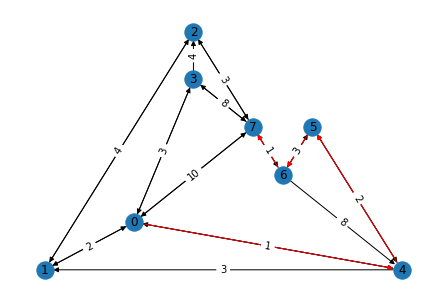

In [6]:
G.add_weighted_edges_from(c.convert_adjacency_matrix(graph))

pos = nx.planar_layout(G)
nx.draw(G, with_labels='True', pos=pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
start_time = time.time()
path = f.fw(graph, 0, 7)
end_time = time.time() - start_time
print(path)
print ('Вермя выполнения: ', '%.6f' %end_time,"sec")
path = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos=pos, edgelist=path, edge_color='red')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))

plt.show()

Вспомогательные функции, изпользованные в программе

In [7]:
def convert_adjacency_matrix(matrix):
    result_list = [(i, j, int(matrix[i][j]))
                   for j in range(len(matrix))
                   for i in range(len(matrix))
                   if matrix[i][j] != 'math.inf']

    return result_list

In [8]:
import math


# принимать должен матрицу смежности и начальныую с конечной вершины
# возвращать должен минимальный путь от одной вершины до другой
def fw(matrix, start, end):

    V = [[int(matrix[i][j]) if matrix[i][j] != 'math.inf' else math.inf
          for j in range(len(matrix))] for i in range(len(matrix))]

    def get_path(P, start, end):
        path = [start]
        while start != end:
            start = P[start][end]
            path = [start] + path

        return path

    N = len(V) # число вершин в графе
    P = [[v for v in range(N)] for u in range(N)] # начальный список предыдущих вершин для поиска кратчайших маршрутов

    for k in range(N):
        for i in range(N):
            for j in range(N):
                d = V[i][k] + V[k][j]
                if V[i][j] > d:
                    V[i][j] = d
                    P[i][j] = k     # номер промежуточной вершины при движении от i к j

    # нумерацця вершин начинается с нуля
    # start = 0
    # end = 7
    return get_path(P, end, start)

Сам граф в текстовом представлении

In [9]:
math.inf, 2, math.inf, 3, 1, math.inf, math.inf, 10
2, math.inf, 4, math.inf, math.inf, math.inf, math.inf, math.inf
math.inf, 4, math.inf, math.inf, math.inf, math.inf, math.inf, 3
3, math.inf, 4, math.inf, math.inf, math.inf, math.inf, 8
1, 3, math.inf, math.inf, math.inf, 2, math.inf, math.inf
math.inf, math.inf, math.inf, math.inf, 2, math.inf, 3, math.inf
math.inf, math.inf, math.inf, math.inf, 8, 3, math.inf, 1
10, math.inf, 3, 8, math.inf, math.inf, 1, math.inf 

(10, inf, 3, 8, inf, inf, 1, inf)